<a href="https://colab.research.google.com/github/smathews88/machine_learning/blob/main/02_ml_logistic_regression_predic_number_in_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predict Number in Image**

---

Predict number in image using logistic regression


# **1. Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# **2. Load dataset and extract depentend and independent variables**

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target
X,y



(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

# **3. Data Visualization**

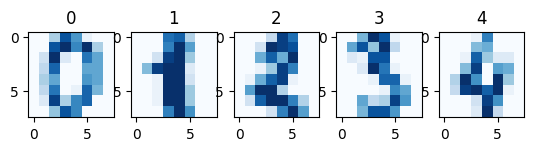

In [ ]:
for i,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1,5,i +1)
  plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.Blues)
  plt.title(label)

# **4. Divide dataset into Train, Test and Validation dataset**

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

# **5. Create Logistic Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

# **6.Train the model**

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **7. Evaluate the model**

3 techniques are used here to evaluate the model:

1) score of the model

2) confusion metrics

3) visualizing the images that were predicted wrong

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 9, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [ ]:
score1 = model.score(X_test,y_test)
score1

0.9666666666666667

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred )
print(cm)


[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


[Text(83.22222222222221, 0.5, 'Predicted Values'),
 Text(0.5, 137.22222222222217, 'Actual Values'),
 Text(0.5, 1.0, 'Accuracy score : 0.9666666666666667')]

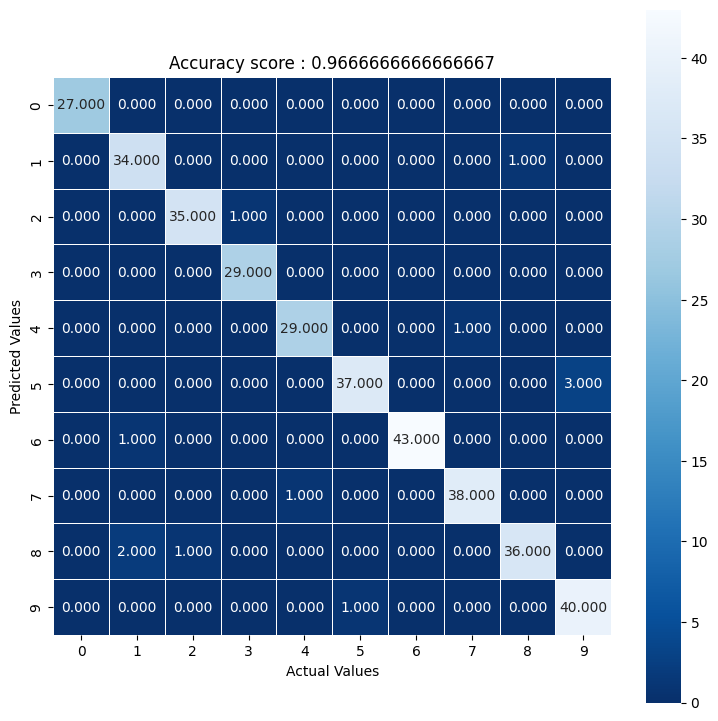

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(9,9))
s = sns.heatmap(cm, fmt = ".3f",annot=True, linewidths=.5, square = True, cmap = plt.cm.Blues_r)
s.set(ylabel = "Predicted Values",xlabel = "Actual Values", title = 'Accuracy score : {0}'.format(score1) )

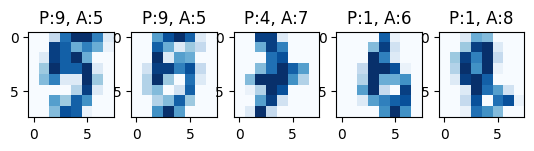

In [ ]:
count = 0
for index,(predicted,actual) in enumerate(zip(y_pred,y_test)):
  if count == 5:
    break
  if predicted != actual :
    plt.subplot(1,5, count + 1)
    plt.imshow(np.reshape(X_test[index], (8,8)), cmap = plt.cm.Blues)
    plt.title("P:" + str(predicted) +", A:" +  str(actual))
    count = count + 1
